# Test if current version works

In [1]:
import hrrr_scraper.hrrr_lab as hrrr_lab

In [2]:
import imp

In [40]:
reload(hrrr_lab)

<module 'hrrr_scraper.hrrr_lab' from '/mnt/telg/prog/hrrr_sraper/hrrr_scraper/hrrr_lab.py'>

In [43]:
modex = imp.load_source('modelextractor', '/mnt/telg/prog/hrrr_sraper/scripts/modelextractor')

In [44]:
workplan = modex.main(config=True, verbose = True, 
           # dry = True,
          )

Under construction. ByBy.
Processing single file: /mnt/telg/prog/hrrr_sraper/examples/operationalize/ncep_hrrr_2d.2133506000000.grib2
tp_8
tp_3
tp_4
tp_9
processing file: /mnt/telg/prog/hrrr_sraper/examples/operationalize/ncep_hrrr_2d.2133506000000.grib2
tp_5
tp_6
tp_7
tp_3
tp_2
tp_1
this way
   netcdf variable name                                          long name  \
0                crefl0  Composite reflectivity at the closest model gr...   
68            snowfrac0      Snow cover at the closest model grid location   
70                tsfc0  Temperature at 2-m at the closest model grid l...   
72               qvsfc0  Specific humidity at 2-m at the closest model ...   
74               rhsfc0  Relative humidity at 2-m at the closest model ...   

   units in extracted/other comments grib2 variable name  messagenumber  \
0                                dBZ    REFC_P0_L10_GLC0            1.0   
68                                 %    SNOWC_P0_L1_GLC0           69.0   
70          

In [54]:
ds = xr.open_dataset('output/test_20211201_06_00.nc')

In [55]:
ds

<xarray.Dataset>
Dimensions:        (forecast_hour: 1, datetime: 1, site: 2)
Coordinates:
  * forecast_hour  (forecast_hour) int8 0
  * datetime       (datetime) datetime64[ns] 2021-12-01T06:00:00
  * site           (site) object 'tst' 'tsz'
Data variables: (12/22)
    crefl0         (forecast_hour, datetime, site) float32 ...
    snowfrac0      (forecast_hour, datetime, site) float32 ...
    tsfc0          (forecast_hour, datetime, site) float32 ...
    qvsfc0         (forecast_hour, datetime, site) float32 ...
    rhsfc0         (forecast_hour, datetime, site) float32 ...
    usfc0          (forecast_hour, datetime, site) float32 ...
    ...             ...
    argmin_y       (forecast_hour, datetime, site) float32 ...
    lat_g          (forecast_hour, datetime, site) float32 ...
    lon_g          (forecast_hour, datetime, site) float32 ...
    lat_s          (forecast_hour, datetime, site) float32 ...
    lon_s          (forecast_hour, datetime, site) float32 ...
    dist_min       (forecast_hour, datetime, site) float32 ...
Attributes:
    forecast_time:   00
    cycle_datetime:  2021-12-01 06:00:00

In [53]:
ds.close()

In [240]:
import atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad as atmsrf

In [243]:
atmsrf.network.stations.Table_Mountain.lon

-105.2368

In [239]:
ds

<xarray.Dataset>
Dimensions:        (forecast_hour: 1, datetime: 1, site: 2)
Coordinates:
  * forecast_hour  (forecast_hour) int8 0
  * datetime       (datetime) datetime64[ns] 2021-12-01T06:00:00
  * site           (site) object 'tst' 'tsz'
Data variables: (12/22)
    crefl0         (forecast_hour, datetime, site) float32 ...
    snowfrac0      (forecast_hour, datetime, site) float32 ...
    tsfc0          (forecast_hour, datetime, site) float32 ...
    qvsfc0         (forecast_hour, datetime, site) float32 ...
    rhsfc0         (forecast_hour, datetime, site) float32 ...
    usfc0          (forecast_hour, datetime, site) float32 ...
    ...             ...
    argmin_y       (forecast_hour, datetime, site) float32 ...
    lat_g          (forecast_hour, datetime, site) float32 ...
    lon_g          (forecast_hour, datetime, site) float32 ...
    lat_s          (forecast_hour, datetime, site) float32 ...
    lon_s          (forecast_hour, datetime, site) float32 ...
    dist_min       (forecast_hour, datetime, site) float32 ...
Attributes:
    forecast_time:   00
    cycle_datetime:  2021-12-01 06:00:00

In [225]:
workplan.path2fout.iloc[0]

PosixPath('/mnt/telg/prog/hrrr_sraper/examples/operationalize/ncep_hrrr_2d.2133506000000.grib2/test_20211201_06_00.nc')

In [220]:
workplan = pd.DataFrame(p2f, columns = ['path2grib',])  

workplan['basics'] = workplan.apply(lambda row: hrrr_lab.open_grib_file(row.path2grib.as_posix(), grab_basics=True), axis = 1)

workplan['ft'] = workplan.apply(lambda row: row.basics['forecastTime'], axis = 1)
workplan['ct'] = workplan.apply(lambda row: row.basics['cycledatetime'], axis = 1)

workplan.drop('basics', axis=1, inplace=True)

nameformat='test_{ct.year:04d}{ct.month:02d}{ct.day:02d}_{ct.hour:02d}_{ft:02d}.nc'

# create the output paths
workplan['path2fout'] = workplan.apply(lambda row: p2fo.joinpath((nameformat.format(ct =row.ct, ft = row.ft))), axis = 1)

# remove from workplan when output path is file
workplan = workplan[~workplan.apply(lambda row: row.path2fout.is_file(), axis = 1)]

In [221]:
workplan.path2fout.iloc[0]

PosixPath('/mnt/telg/prog/hrrr_sraper/examples/operationalize/ncep_hrrr_2d.2133506000000.grib2/test_20211201_06_00.nc')

In [208]:
row = workplan.iloc[0]

In [210]:
row.path2fout.is_file()

False

In [204]:
def format_path2out(row, p2fo, nameformat):
    # ct = row.ct
    # ft = row.ft
    fn = nameformat.format(ct =row.ct, ft = row.ft)
    return p2fo.joinpath(fn)
format_path2out(row, p2fo, nameformat)

PosixPath('/mnt/telg/prog/hrrr_sraper/examples/operationalize/ncep_hrrr_2d.2133506000000.grib2/test_20211201_06_00.nc')

In [ ]:
nameformat='test_{cycle_datetime.year:04d}{cycle_datetime.month:02d}{cycle_datetime.day:02d}_{cycle_datetime.hour:02d}_{forcast_hour:02d}.nc'

In [185]:
hrrr_lab.open_grib_file(row.path2grib.as_posix(), grab_basics=True)

{'forecastTime': 0, 'cycledatetime': Timestamp('2021-12-01 06:00:00')}

In [29]:
import hrrr_scraper.hrrr_lab as hrrrlab

In [72]:
import atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad as atmsrf

In [108]:
reload(hrrrlab)

<module 'hrrr_scraper.hrrr_lab' from '/mnt/telg/prog/hrrr_sraper/hrrr_scraper/hrrr_lab.py'>

In [109]:
%%time
fn = './ncep_hrrr_2d.2133506000000.grib2'
hrrrinst = hrrrlab.open_grib_file(fn, external_params=True)


CPU times: user 4.9 s, sys: 756 ms, total: 5.66 s
Wall time: 5.65 s


In [110]:
hrrrinst.ds

<xarray.Dataset>
Dimensions:    (x: 1059, y: 1799)
Coordinates:
    latitude   (x, y) float32 21.14 21.15 21.15 21.16 ... 47.86 47.85 47.84
    longitude  (x, y) float32 -122.7 -122.7 -122.7 ... -60.99 -60.95 -60.92
Dimensions without coordinates: x, y
Data variables: (12/15)
    crefl0     (x, y) float32 -10.0 -10.0 -10.0 -10.0 ... -10.0 -10.0 -10.0
    snowfrac0  (x, y) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tsfc0      (x, y) float32 294.6 294.6 294.6 294.6 ... 274.1 274.2 274.2
    qvsfc0     (x, y) float32 0.01101 0.01101 0.01101 ... 0.00247 0.00248 0.0025
    rhsfc0     (x, y) float32 70.4 70.4 70.5 70.5 70.6 ... 62.5 62.8 63.0 63.2
    usfc0      (x, y) float32 -4.883 -4.883 -4.883 -4.82 ... 11.24 11.24 11.24
    ...         ...
    ustar0     (x, y) float32 0.19 0.19 0.19 0.19 0.18 ... 0.53 0.53 0.53 0.54
    sflux0     (x, y) float32 10.0 10.0 10.0 10.0 ... 100.0 100.0 100.0 100.0
    lflux0     (x, y) float32 138.0 139.0 139.0 138.0 ... 165.0 166.0 167.0
    gflux0     (x, y) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    vegtype0   (x, y) float32 17.0 17.0 17.0 17.0 17.0 ... 17.0 17.0 17.0 17.0
    cbh0       (x, y) float32 2.26e+04 2.26e+04 2.27e+04 ... 9.03e+04 9.03e+04
Attributes:
    forecast_time:   00
    cycle_datetime:  2021-12-01 06:00:00

In [111]:
proj = hrrrinst.project2sites(atmsrf.network, vp = False)

In [117]:
proj.save('./', nameformat='test_{cycle_datetime.year:04d}{cycle_datetime.month:02d}{cycle_datetime.day:02d}_{cycle_datetime.hour:02d}_{forcast_hour:02d}.nc', verbose=True)

Encoding applied in to_netcdf
saving to test_20211201_06_00.nc


0

In [118]:
xr.open_dataset('/mnt/telg/tmp/testhrrr/outfld/test_20211201_06_00.nc')

<xarray.Dataset>
Dimensions:        (forecast_hour: 1, datetime: 1, site: 2)
Coordinates:
  * forecast_hour  (forecast_hour) int8 0
  * datetime       (datetime) datetime64[ns] 2021-12-01T06:00:00
  * site           (site) object 'tst' 'tsz'
Data variables: (12/22)
    crefl0         (forecast_hour, datetime, site) float32 ...
    snowfrac0      (forecast_hour, datetime, site) float32 ...
    tsfc0          (forecast_hour, datetime, site) float32 ...
    qvsfc0         (forecast_hour, datetime, site) float32 ...
    rhsfc0         (forecast_hour, datetime, site) float32 ...
    usfc0          (forecast_hour, datetime, site) float32 ...
    ...             ...
    argmin_y       (forecast_hour, datetime, site) float32 ...
    lat_g          (forecast_hour, datetime, site) float32 ...
    lon_g          (forecast_hour, datetime, site) float32 ...
    lat_s          (forecast_hour, datetime, site) float32 ...
    lon_s          (forecast_hour, datetime, site) float32 ...
    dist_min       (forecast_hour, datetime, site) float32 ...
Attributes:
    forecast_time:   00
    cycle_datetime:  2021-12-01 06:00:00

In [49]:
row

typeOfLevel                                           atmosphere
level                                                        0.0
units                                                         dB
parameterName                                                196
nameOfFirstFixedSurface                        Entire atmosphere
nameOfSecondFixedSurface                                 Missing
shortNameECMF                                            unknown
shortName                                                   refc
nameECMF                                                 unknown
name                        Maximum/Composite radar reflectivity
cfNameECMF                                               unknown
cfName                                                   unknown
cfVarNameECMF                                            unknown
cfVarName                                                unknown
Name: 0, dtype: object

In [52]:
grbsel = grbs.select(**row.to_dict())[0]

In [55]:
grbsel.name

'Maximum/Composite radar reflectivity'

In [57]:
grbs[2]

2:3:3 (instant):lambert:cloudTop:level 0:fcst time 0 hrs:from 202112010600

In [119]:
import argparse

In [120]:
parser = argparse.ArgumentParser()

In [ ]:
parser.add_argument(

# config file

In [121]:
import configparser
import ast

In [66]:
config = configparser.ConfigParser(allow_no_value=True, )
config.optionxform = str
######################################
sect_fileio = 'file_io'
config[sect_fileio] = {}
config[sect_fileio]['#input_file_type: todo: this should not be necessary, there are hopefully a key in each grib file telling me what it is?!?'] =None
config[sect_fileio]['input_file_type'] = 'HRRRv4_3d #todo: this should not be necessary, there are hopefully a key in each grib file telling me what it is?!?'

config[sect_fileio]['#path2input: Path to file or folder. If folder all files ending with "grib" will be processed.'] = None
config[sect_fileio]['path2input'] = 'prog/hrrr_sraper/examples/operationalize/ncep_hrrr_3d.2133506000000.grib2'

config[sect_fileio]['#path2output: Path to folder where output files are being saved to'] = None
config[sect_fileio]['path2output'] = 'prog/hrrr_sraper/examples/operationalize/ #path to folder where to save output'

config[sect_fileio]['#outputnameformat: This is the format of each output file. Available variables are: datetime (cycle time), forcasthour, forcastminute, model, '] = None
config[sect_fileio]['outputnameformat'] = '{model}_bestnetworkofalltime_{datetime}{forcasthour}{forcastminute}.nc'

######################################
sect_locationcoll = 'location collections'
config[sect_locationcoll] = {}
config[sect_locationcoll]['#Paths (relative or absolute) to files containing location collections.'] = None
config[sect_locationcoll]['#Follow one of the formats below when creating files'] = None
config[sect_locationcoll]['#- Same format like in locations section below.'] = None
config[sect_locationcoll]['#- Todo: Daves format'] = None

######################################
sect_locations = 'locations'
config[sect_locations] = {}
config[sect_locations]['# These are the locations for which model values are extracted.'] = None
config[sect_locations]['# Example:'] = None
config[sect_locations]["# TBL = 'name': 'Table Mountain (CO)', 'lat': 1, 'lon': 2"] = None
# config[sect_locations]['# '] = None
# config[sect_locations]['# '] = None
# config[sect_locations]['# '] = None
# config[sect_locations]['# '] = None
config[sect_locations]['TBL'] = "'name': 'Table Mountain (CO)', 'lat': 1, 'lon': 2"


########################################
sect_variables = 'variables'
config[sect_variables] = {}
config[sect_variables]['# Variables to be extracted. Comment out (add a # to the beginning of the line) variables that are not needed.'] = None
config[sect_variables]['# For more info on variable see https://drive.google.com/drive/u/0/folders/1dUn_o9Nxoga9lKvGx7i_898_t8siOMJB'] = None
config[sect_variables]['CH4_hf #Methane from Human fats'] = None


In [126]:
p2conf = 'example.ini'

In [67]:
with open(p2conf, 'w') as configfile:
    config.write(configfile)

## open

In [244]:
import importlib.resources as pkg_resources

In [254]:
import ast

In [284]:
import hrrr_scraper.extraction_configuration as hsec

In [331]:
reload(hsec)

<module 'hrrr_scraper.extraction_configuration' from '/mnt/telg/prog/hrrr_sraper/hrrr_scraper/extraction_configuration.py'>

In [332]:
config_in = configparser.ConfigParser(allow_no_value=True,)

In [333]:
with pkg_resources.open_text('hrrr_scraper.extra', 'example.ini') as rein:
    config_in.read_string(rein.read())

In [335]:
sites = []
for v in config_in['variables'].keys():
    break

In [339]:
[v.split('#')[0].strip() for v in config_in['variables'].keys()]

['crefl0',
 'snowfrac0',
 'tsfc0',
 'qvsfc0',
 'rhsfc0',
 'usfc0',
 'vsfc0',
 'prate0',
 'csnow0',
 'ustar0',
 'sflux0',
 'lflux0',
 'gflux0',
 'vegtype0',
 'cbh0']

In [342]:
variables = [v.split('#')[0].strip() for v in config_in['variables'].keys()]

In [345]:
df = df['netcdf variable name'].isin(variables)

In [346]:
df

0      True
68     True
70     True
72     True
74     True
76     True
77     True
82     True
89     True
94     True
95     True
96     True
101    True
102    True
118    True
Name: netcdf variable name, dtype: bool

In [327]:
print(hsec.get_all_variable_names())

crefl0       # Composite reflectivity at the closest model grid location
snowfrac0    # Snow cover at the closest model grid location
tsfc0        # Temperature at 2-m at the closest model grid location
qvsfc0       # Specific humidity at 2-m at the closest model grid location
rhsfc0       # Relative humidity at 2-m at the closest model grid location
usfc0        # U-component of wind at 10-m at the closest model grid location
vsfc0        # V-component of wind at 10-m at the closest model grid location
prate0       # Precipitation rate reaching the surface at the closest model grid location
csnow0       # Categorical snow (1-yes, 0-no) at the closest model grid location
ustar0       # Friction velocity at the closest model grid location
sflux0       # Sensible heat flux at the closest model grid location
lflux0       # Latent heat flux at the closest model grid location
gflux0       # Ground heat flux at the closest model grid location
vegtype0     # Vegetation type at the closest mod

In [261]:
a = config_in['locations'].keys()

In [263]:
(bla.keys())

['tbl']

In [258]:
site.append(

{'name': 'Table Mountain (CO)', 'lat': 40.12498, 'lon': -105.2368}

In [256]:
ast.literal_eval(bla)

{'name': 'Table Mountain (CO)', 'lat': 40.12498, 'lon': -105.2368}

In [159]:
bla = 'asdf '

In [160]:
bla.strip()

'asdf'

In [148]:
rein = pkg_resources.open_text('hrrr_scraper.extra', 'example.ini')

In [149]:
config_in.read_string(rein.read())

In [144]:
rein.read()

'[file_io]\ninput_file_type = HRRRv4_2d #todo: this should not be necessary, there are hopefully a key in each grib file telling me what it is?!?\n#path2input = prog/hrrr_sraper/examples/operationalize/ncep_hrrr_3d.2133506000000.grib2\n#path2output: Path to file or folder. If folder all files ending with "grib" will be processed.\n#path2output = prog/hrrr_sraper/examples/operationalize/ #path to folder where to save output\n#outputnameformat = hrrr_surfrad_{datetime}.nc\n\n[location collections]\n#Paths (relative or absolute) to files containing location collections.\n#Follow one of the formats below when creating files\n#- Same format like in locations section below.\n#- Todo: Daves format\n\n[locations]\n# These are the locations for which model values are extracted.\n# Example:\n# TBL = \'name\': \'Table Mountain (CO)\', \'lat\': 1, \'lon\': 2\nTBL = \'name\': \'Table Mountain (CO)\', \'lat\': 1, \'lon\': 2\n\n[variables]\n# Variables to be extracted. Comment out (add a # to the beg

In [151]:
config_in.keys()

KeysView(<configparser.ConfigParser object at 0x7f9431886a30>)

In [140]:
config_in.read(pkg_resources.open_text('hrrr_scraper.extra', 'example.ini'))

[]

In [130]:
config_in = configparser.ConfigParser(allow_no_value=True,)
config_in.read('/mnt/telg/prog/hrrr_sraper/hrrr_scraper/extra/example.ini')

['/mnt/telg/prog/hrrr_sraper/hrrr_scraper/extra/example.ini']

In [125]:
p2conf

NameError: name 'p2conf' is not defined

In [127]:
config_in = configparser.ConfigParser(allow_no_value=True,)
config_in.read(p2conf)

['example.ini']

In [128]:
config_in['file_io']['path2output']

'prog/hrrr_sraper/examples/operationalize/ #path to folder where to save output'

In [59]:
sec = config['locations']

In [60]:
list(sec.keys())

['# These are the locations for which model values are extracted.',
 '# Example:',
 "# TBL = 'name': 'Table Mountain (CO)', 'lat': 1, 'lon': 2",
 'TBL']

In [240]:
ast.literal_eval(f'{{{sec["TBL"]}}}')

{'name': 'Table Mountain (CO)', 'lat': 1, 'lon': 2}

In [241]:
list(config_in['variables'].keys())

[]

# **TODO** Open grib file and detect what type of file it is

# incorporate variable match tables

## read the table

In [40]:
p2varmatch = 'hrrr_2d_grb_info_matched.xlsx'
df = pd.read_excel(p2varmatch)
df

,netcdf variable name,long name,units in extracted/other comments,grib2 variable name,messagenumber,typeOfLevel,level,units,parameterName,nameOfFirstFixedSurface,nameOfSecondFixedSurface,shortNameECMF,shortName,nameECMF,name,cfNameECMF,cfName,cfVarNameECMF,cfVarName
0,crefl0,Composite reflectivity at the closest model gr...,dBZ,REFC_P0_L10_GLC0,1.0,atmosphere,0.0,dB,196,Entire atmosphere,Missing,unknown,refc,unknown,Maximum/Composite radar reflectivity,unknown,unknown,unknown,unknown
1,NaN,NaN,NaN,NaN,2.0,cloudTop,0.0,unknown,3,Level of cloud tops,Missing,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
2,NaN,NaN,NaN,NaN,3.0,atmosphere,0.0,unknown,201,Entire atmosphere,Missing,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
3,NaN,NaN,NaN,NaN,4.0,atmosphere,0.0,kg m**-1,Vertically-integrated liquid,Entire atmosphere,Missing,veril,veril,Vertically-integrated liquid,Vertically-integrated liquid,unknown,unknown,veril,veril
4,NaN,NaN,NaN,NaN,5.0,surface,0.0,m,Visibility,Ground or water surface,Missing,vis,vis,Visibility,Visibility,unknown,unknown,vis,vis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,NaN,NaN,NaN,NaN,166.0,surface,0.0,(0 - 1),Ice cover,Ground or water surface,Missing,ci,ci,Sea ice area fraction,Sea ice area fraction,sea_ice_area_fraction,sea_ice_area_fraction,siconc,siconc
166,NaN,NaN,NaN,NaN,167.0,nominalTop,0.0,unknown,1,Nominal top of the atmosphere,Missing,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
167,NaN,NaN,NaN,NaN,168.0,nominalTop,0.0,unknown,2,Nominal top of the atmosphere,Missing,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
168,NaN,NaN,NaN,NaN,169.0,nominalTop,0.0,unknown,7,Nominal top of the atmosphere,Missing,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown


In [43]:
df.iloc[[0,68], :]

,netcdf variable name,long name,units in extracted/other comments,grib2 variable name,messagenumber,typeOfLevel,level,units,parameterName,nameOfFirstFixedSurface,nameOfSecondFixedSurface,shortNameECMF,shortName,nameECMF,name,cfNameECMF,cfName,cfVarNameECMF,cfVarName
0,crefl0,Composite reflectivity at the closest model gr...,dBZ,REFC_P0_L10_GLC0,1.0,atmosphere,0.0,dB,196,Entire atmosphere,Missing,unknown,refc,unknown,Maximum/Composite radar reflectivity,unknown,unknown,unknown,unknown
68,snowfrac0,Snow cover at the closest model grid location,%,SNOWC_P0_L1_GLC0,69.0,surface,0.0,%,Snow cover,Ground or water surface,Missing,snowc,snowc,Snow cover,Snow cover,unknown,unknown,snowc,snowc


## pick only those with netcdf names

In [6]:
df = df[~(df['netcdf variable name'].isna())]

In [8]:
df

,netcdf variable name,long name,units in extracted/other comments,grib2 variable name,messagenumber,typeOfLevel,level,units,parameterName,nameOfFirstFixedSurface,nameOfSecondFixedSurface,shortNameECMF,shortName,nameECMF,name,cfNameECMF,cfName,cfVarNameECMF,cfVarName
0,crefl0,Composite reflectivity at the closest model gr...,dBZ,REFC_P0_L10_GLC0,1.0,atmosphere,0.0,dB,196,Entire atmosphere,Missing,unknown,refc,unknown,Maximum/Composite radar reflectivity,unknown,unknown,unknown,unknown
68,snowfrac0,Snow cover at the closest model grid location,%,SNOWC_P0_L1_GLC0,69.0,surface,0.0,%,Snow cover,Ground or water surface,Missing,snowc,snowc,Snow cover,Snow cover,unknown,unknown,snowc,snowc
70,tsfc0,Temperature at 2-m at the closest model grid l...,C,TMP_P0_L103_GLC0,71.0,heightAboveGround,2.0,K,Temperature,Specified height level above ground,Missing,2t,2t,2 metre temperature,2 metre temperature,air_temperature,air_temperature,t2m,t2m
72,qvsfc0,Specific humidity at 2-m at the closest model ...,g kg**-1,SPFH_P0_L103_GLC0,73.0,heightAboveGround,2.0,kg kg**-1,Specific humidity,Specified height level above ground,Missing,2sh,2sh,2 metre specific humidity,2 metre specific humidity,specific_humidity,specific_humidity,sh2,sh2
74,rhsfc0,Relative humidity at 2-m at the closest model ...,%,RH_P0_L103_GLC0,75.0,heightAboveGround,2.0,%,Relative humidity,Specified height level above ground,Missing,2r,2r,2 metre relative humidity,2 metre relative humidity,relative_humidity,relative_humidity,r2,r2
76,usfc0,U-component of wind at 10-m at the closest mod...,m s**-1,?,77.0,heightAboveGround,10.0,m s**-1,u-component of wind,Specified height level above ground,Missing,10u,10u,10 metre U wind component,10 metre U wind component,eastward_wind,eastward_wind,u10,u10
77,vsfc0,V-component of wind at 10-m at the closest mod...,m s**-1,?,78.0,heightAboveGround,10.0,m s**-1,v-component of wind,Specified height level above ground,Missing,10v,10v,10 metre V wind component,10 metre V wind component,northward_wind,northward_wind,v10,v10
82,prate0,Precipitation rate reaching the surface at the...,kg m**-2 s**-1,PRATE_P0_L1_GLC0,83.0,surface,0.0,kg m**-2 s**-1,Precipitation rate,Ground or water surface,Missing,prate,prate,Precipitation rate,Precipitation rate,unknown,unknown,prate,prate
89,csnow0,"Categorical snow (1-yes, 0-no) at the closest ...","unitless (1-yes, 0-no)",CSNOW_P0_L1_GLC0,90.0,surface,0.0,(Code table 4.222),Categorical snow,Ground or water surface,Missing,csnow,csnow,Categorical snow,Categorical snow,unknown,unknown,csnow,csnow
94,ustar0,Friction velocity at the closest model grid lo...,m s**-1,FRICV_P0_L1_GLC0,95.0,surface,0.0,m s**-1,Frictional velocity,Ground or water surface,Missing,fricv,fricv,Frictional velocity,Frictional velocity,unknown,unknown,fricv,fricv


# search and read these variable

In [23]:
params = []
for idx, row in df.iterrows():
    break

In [26]:
row.typeOfLevel == hybird

typeOfLevel                                           atmosphere
level                                                        0.0
units                                                         dB
parameterName                                                196
nameOfFirstFixedSurface                        Entire atmosphere
nameOfSecondFixedSurface                                 Missing
shortNameECMF                                            unknown
shortName                                                   refc
nameECMF                                                 unknown
name                        Maximum/Composite radar reflectivity
cfNameECMF                                               unknown
cfName                                                   unknown
cfVarNameECMF                                            unknown
cfVarName                                                unknown
Name: 0, dtype: object

In [25]:
# remove all those that where added by hand

row.pop('netcdf variable name')
row.pop('long name')
row.pop('units in extracted/other comments')
row.pop('grib2 variable name')
msg = row.pop('messagenumber')

In [28]:
row.to_dict()

{'typeOfLevel': 'atmosphere',
 'level': 0.0,
 'units': 'dB',
 'parameterName': '196',
 'nameOfFirstFixedSurface': 'Entire atmosphere',
 'nameOfSecondFixedSurface': 'Missing',
 'shortNameECMF': 'unknown',
 'shortName': 'refc',
 'nameECMF': 'unknown',
 'name': 'Maximum/Composite radar reflectivity',
 'cfNameECMF': 'unknown',
 'cfName': 'unknown',
 'cfVarNameECMF': 'unknown',
 'cfVarName': 'unknown'}

In [21]:
# todo: necessarey? Remove all that have no meaning

1.0

KeyError: ''

## **todo** select only those that are in the config file

# script run results

In [2]:
ds = xr.open_dataset('testme.nc')

In [5]:
ds = xr.open_dataset('test3py38.nc')

In [7]:
ds = xr.open_dataset('test3py38updated.nc')

In [14]:
ds = xr.open_dataset('test3py38updatednetcdf.nc')

In [15]:
dst = xr.open_dataset('testpy38test.nc')

In [35]:
dst = xr.open_dataset('testpy38test_new.nc')

<AxesSubplot:xlabel='altitude'>

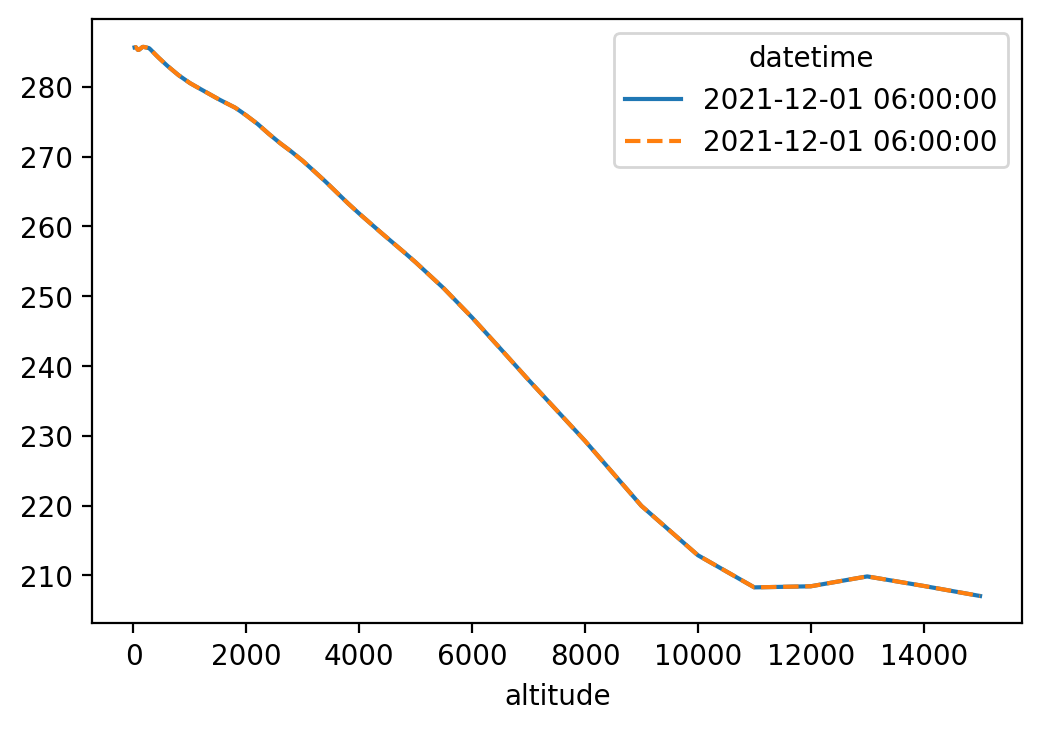

In [50]:
a = dst.temperature_vp.sel(site='tst', forecast_hour = 0).to_pandas().transpose().plot()
ds.temperature_vp.sel(site='tst', forecast_hour = 0).to_pandas().transpose().plot(ax= a, ls = '--')

In [47]:
ds = xr.open_dataset('testpy38_new.nc')

In [18]:
import libnetcdf

ModuleNotFoundError: No module named 'libnetcdf'

In [19]:
import netCDF4

In [20]:
netCDF4.__version__

'1.5.6'

In [22]:
netCDF4.getlibversion()

'4.7.4 of Dec 14 2020 16:14:56 $'

In [30]:
libversion = [int(i) for i in xr.backends.netCDF4_.netCDF4.getlibversion()[:3].split('.')]

assert(libversion[0] == 4)

libversion[1] <= 7

In [33]:
1 == False

False

In [17]:
dst

<xarray.Dataset>
Dimensions:                                        (forecast_hour: 1, datetime: 1, site: 2, altitude: 61)
Coordinates:
  * forecast_hour                                  (forecast_hour) int64 0
  * datetime                                       (datetime) datetime64[ns] ...
  * site                                           (site) object 'tst' 'tsz'
  * altitude                                       (altitude) float32 10.0 .....
Data variables: (12/48)
    aerosol_mass_density_ground_level              (forecast_hour, datetime, site) float32 ...
    downward_long_wave_radiation_flux_surface      (forecast_hour, datetime, site) float32 ...
    upward_long_wave_radiation_flux_surface        (forecast_hour, datetime, site) float32 ...
    downward_short_wave_radiation_flux_surface     (forecast_hour, datetime, site) float32 ...
    uward_short_wave_radiation_flux_surface        (forecast_hour, datetime, site) float32 ...
    orography                                      (forecast_hour, datetime, site) float32 ...
    ...                                             ...
    vertical_velocity_vp                           (forecast_hour, datetime, site, altitude) float32 ...
    turbulent_kinetic_energy_vp                    (forecast_hour, datetime, site, altitude) float32 ...
    cloud_mixing_ratio_vp                          (forecast_hour, datetime, site, altitude) float32 ...
    ice_water_mixing_ratio_vp                      (forecast_hour, datetime, site, altitude) float32 ...
    rain_mixing_ratio_vp                           (forecast_hour, datetime, site, altitude) float32 ...
    snow_mixing_ratio_vp                           (forecast_hour, datetime, site, altitude) float32 ...
Attributes:
    forecast_time:   00
    cycle_datetime:  2021-12-01 06:00:00

In [12]:
ds = xr.open_dataset('test3.nc')

RuntimeError: NetCDF: HDF error

In [11]:
print(ds)

<xarray.Dataset>
Dimensions:                                        (forecast_hour: 1, datetime: 1, site: 2, altitude: 61)
Coordinates:
  * forecast_hour                                  (forecast_hour) int8 0
  * datetime                                       (datetime) datetime64[ns] ...
  * site                                           (site) object 'tst' 'tsz'
  * altitude                                       (altitude) float32 10.0 .....
Data variables: (12/48)
    aerosol_mass_density_ground_level              (forecast_hour, datetime, site) float32 ...
    downward_long_wave_radiation_flux_surface      (forecast_hour, datetime, site) float32 ...
    upward_long_wave_radiation_flux_surface        (forecast_hour, datetime, site) float32 ...
    downward_short_wave_radiation_flux_surface     (forecast_hour, datetime, site) float32 ...
    uward_short_wave_radiation_flux_surface        (forecast_hour, datetime, site) float32 ...
    orography                                      (